[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_07-TheMachineLearningFramework/blob/master/M07_A--DJ--The_Machine_Learning_Framework.ipynb)

# The Machine Learning Framework:

By the end of this assignment, I hope you begin to feel like a real data scientist. 

For your assignment I have obtained a dataset of 3333 records of cell phone user data. Your mission -should you choose to accept it- is to train a model that can predict whether or not a user "churns" -cancels their plan at the end of the month. 

The purpose of this assignment is for you to familiarize yourself with what we call **The Machine Learning Framework**:

![The Machine Learning Framework](http://www.ryanleeallred.com/wp-content/uploads/2018/05/machine-learning-framework-1.png)

This will be one of your first opportunities to go from A-Z on a project. What's exciting about this assignment is that you are free to do whatever you think will get you the best performing classifier using the Machine Learning Framework as a guide. 

What is also exciting about this assignment is that we will be using a private Kaggle competition to score your models!

## The Process: 

**You shouldn't just go through the cycle pictured above just once.**

Start off by doing what seems like the *bare minimum* in order to train your classifier and make predictions that are slightly better than random. As you explore the data, make a note of ways that you can improve your model. Then, after you have made your first-pass predictions, prioritize your list of improvements based on their difficulty and estimated value. Each time you make an improvement, re-train and re-validate your model to see if your changes have truly made your classifier better. 

As you go through this cycle of improving your data/model and validating your improvements, your predictions will get better and better until you simply run out of time to make more improvements.  


## Business Understanding

Gaining domain knowledge and a business understanding about a problem is extremely useful. It wil help you communicate your findings to stakeholders and give you insights about the data exploration process.

[What is churn analysis?](https://www.datascience.com/blog/what-is-a-churn-analysis-and-why-is-it-valuable-for-business)

[The importance of predicting customer churn ](https://www.optimove.com/learning-center/customer-churn-prediction-and-prevention)

## The Data:

You will have access to a randomly selected 66.66% of the data for your training dataset. This will have all of the columns **including** whether or not the customer churned. The other 33.33% will be in the test dataset **without** any information about the customer churn. You will run experiments on the training dataset, but ultimately will be required to make predictions and submissions to our private Kaggle Leaderboard using the test dataset.

## [Access the data and the Kaggle leaderboard here](https://www.kaggle.com/t/148ead80810e46ae8383517a543756dd)

**You are going to need to create an account on Kaggle if you don't already have one.**

### Once I:

1. Set up my Kaggle Account

2. downloaded and api key to my local computer ~/.kaggle/kaggle.json

3. Agreed to the terms of the competition

I was able to download the the files from the competition to my Anaconda environment with this command:


!kaggle competitions download -c lambda-school-churn-challenge

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# the necessary files are in the working directory
!ls -lh train.csv test.csv submission.csv

-rw-r--r--  1 darwinm  staff   8.3K May 16 20:57 submission.csv
-rw-r--r--  1 darwinm  staff   104K May 16 20:57 test.csv
-rw-r--r--  1 darwinm  staff   198K May 16 20:57 train.csv


## Data Understanding

Do whatever exploratory data analysis you need to do in order to be educated about what's in this dataset. You're going to need some graphs at the bare minimum.

In [4]:
### Download the data from the Kaggle competition through the API
#!kaggle competitions download -c lambda-school-churn-challenge
#!ls ~/.kaggle/competitions/lambda-school-churn-challenge/

In [25]:
#copy the downloaded datasets from the default directory for Kaggle

#!cp ~/.kaggle/competitions/lambda-school-churn-challenge/train.csv .
#!cp ~/.kaggle/competitions/lambda-school-churn-challenge/test.csv .
#!cp ~/.kaggle/competitions/lambda-school-churn-challenge/sampleSubmission.csv submission.csv

df_sample = pd.read_csv('submission.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_sample.shape, df_train.shape, df_test.shape)

(1111, 2) (2222, 22) (1111, 22)


In [26]:
# test submission
#!kaggle competitions submit -c lambda-school-churn-challenge -f submission.csv -m "Test Submission"

In [27]:
df_sample.head()

id  churn
0   221      1
1  1313      1
2  1635      1
3   289      1
4  2416      1

In [28]:
df_train.head()
df_train.churn.unique()

array([0, 1])

In [29]:
df_test.head()
df_test.churn.unique()

array([9999])

In [30]:
df_test[:0]


Empty DataFrame
Columns: [id, state, account_length, area_code, phone, international_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 22 columns]

In [32]:
df_train0 = df_train.replace('?', np.NaN)
df_train0["international_plan"].replace(('yes', 'no'), (1, 0), inplace=True)
df_train0["vmail_plan"].replace(('yes', 'no'), (1, 0), inplace=True)

In [35]:
pd.options.display.max_columns = None
df_train0.head()

id state  account_length area_code     phone  international_plan  \
0  3200    CT             100       510  416-1536                 1.0   
1  2129    CT             146       408  380-3329                 0.0   
2   598    AZ              84       415  341-2360                 0.0   
3  2507    VT              43       408  331-8713                 0.0   
4  1248    PA             101       415  368-2074                 NaN   

   vmail_plan  vmail_message  day_mins  day_calls day_charge eve_mins  \
0         0.0              0     107.2         98      18.22     86.8   
1         1.0             23     149.6         96      25.43    239.8   
2         0.0              0     159.0         80      27.03    167.9   
3         0.0              0     135.8        125      23.09    163.2   
4         0.0              0     193.7        108      32.93    186.6   

  eve_calls  eve_charge  night_mins  night_calls night_charge  intl_mins  \
0       122        7.38       156.2          117         7.03        9.7   
1       124       20.38       293.5          135        13.21        7.4   
2       128       14.27       167.6          101         7.54       12.3   
3        88       13.87       229.8          106        10.34       12.6   
4       NaN       15.86       223.0          100          NaN       11.6   

  intl_calls intl_charge  custserv_calls  churn  
0          4        2.62               1      0  
1          4           2               2      0  
2          5        3.32               1      0  
3        NaN         3.4               0      0  
4          8        3.13               0      0

In [37]:
#### BAD DATA GIT ER DONE BLOCK ####
# This is just to get a submission. Revisit everything here!

# This will take all non-numeric values and force them to be NaNs will probably lose a small amount of data here.
df_train0 = df_train0.apply(pd.to_numeric, errors='coerce')
print(df_train0.dtypes)


id                      int64
state                 float64
account_length          int64
area_code             float64
phone                 float64
international_plan    float64
vmail_plan            float64
vmail_message           int64
day_mins              float64
day_calls               int64
day_charge            float64
eve_mins              float64
eve_calls             float64
eve_charge            float64
night_mins            float64
night_calls             int64
night_charge          float64
intl_mins             float64
intl_calls            float64
intl_charge           float64
custserv_calls          int64
churn                   int64
dtype: object


In [38]:
# Fill NaN values with mean column values

df_train0.fillna(df_train0.mean(), inplace=True)

# Count the number of NaN values in each column

print(df_train0.isnull().sum())

id                       0
state                 2222
account_length           0
area_code                0
phone                 2222
international_plan       0
vmail_plan               0
vmail_message            0
day_mins                 0
day_calls                0
day_charge               0
eve_mins                 0
eve_calls                0
eve_charge               0
night_mins               0
night_calls              0
night_charge             0
intl_mins                0
intl_calls               0
intl_charge              0
custserv_calls           0
churn                    0
dtype: int64


In [39]:
# Drop dolumns that I don't want to deal with rn.
df_train0 = df_train0.drop('area_code', axis=1)
df_train0 = df_train0.drop('phone', axis=1)
df_train0 = df_train0.drop('state', axis=1)

print(df_train0.shape)
df_train0.head(10)

(2222, 19)


id  account_length  international_plan  vmail_plan  vmail_message  \
0  3200             100            1.000000         0.0              0   
1  2129             146            0.000000         1.0             23   
2   598              84            0.000000         0.0              0   
3  2507              43            0.000000         0.0              0   
4  1248             101            0.093617         0.0              0   
5  2582             116            0.000000         0.0              0   
6  2359              71            0.000000         1.0             31   
7  2224              68            0.000000         0.0              0   
8  1661              92            0.000000         1.0             38   
9  2895              33            1.000000         0.0              0   

   day_mins  day_calls  day_charge  eve_mins   eve_calls  eve_charge  \
0     107.2         98       18.22      86.8  122.000000        7.38   
1     149.6         96       25.43     239.8  124.000000       20.38   
2     159.0         80       27.03     167.9  128.000000       14.27   
3     135.8        125       23.09     163.2   88.000000       13.87   
4     193.7        108       32.93     186.6   99.797225       15.86   
5     205.0         90       34.85     140.9  114.000000       11.98   
6     115.4         90       19.62     217.4   78.000000       18.48   
7     143.6         80       24.41     134.3   65.000000       11.42   
8     242.2         96       41.17     159.7  144.000000       13.57   
9     164.0         99       27.88     153.1  102.000000       13.01   

   night_mins  night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0       156.2          117      7.030000        9.7    4.000000         2.62   
1       293.5          135     13.210000        7.4    4.000000         2.00   
2       167.6          101      7.540000       12.3    5.000000         3.32   
3       229.8          106     10.340000       12.6    4.504244         3.40   
4       223.0          100      8.982913       11.6    8.000000         3.13   
5       272.6           96      8.982913        7.5    4.000000         2.03   
6       239.9          102      8.982913       13.1    4.000000         3.54   
7       215.6           84      9.700000       15.5    5.000000         4.19   
8       210.0          108      9.450000        8.9    1.000000         2.40   
9       123.8          104      8.982913        6.4    4.000000         1.73   

   custserv_calls  churn  
0               1      0  
1               2      0  
2               1      0  
3               0      0  
4               0      0  
5               2      0  
6               1      0  
7               2      0  
8               1      0  
9               0      0

In [ ]:
##### End BAD DATA GIT ER DONE BLOCK ####

In [40]:
df_test0 = df_test.replace('?', np.NaN)
df_test0["international_plan"].replace(('yes', 'no'), (1, 0), inplace=True)
df_test0["vmail_plan"].replace(('yes', 'no'), (1, 0), inplace=True)


#### BAD DATA GIT ER DONE BLOCK ####
# This is just to get a submission. Revisit everything here!

df_test0 = df_test0.apply(pd.to_numeric, errors='coerce')
df_test0.fillna(df_test0.mean(), inplace=True)

df_test0 = df_test0.drop('area_code', axis=1)
df_test0 = df_test0.drop('phone', axis=1)
df_test0 = df_test0.drop('state', axis=1)

print(df_test0.shape)
df_test0.head(10)

##### End BAD DATA GIT ER DONE BLOCK ####

(1111, 19)


id  account_length  international_plan  vmail_plan  vmail_message  \
0   221             127            0.000000         1.0             22   
1  1313             100            0.000000         0.0              0   
2  1635              66            0.000000         0.0              0   
3   289              89            0.000000         0.0              0   
4  2416             113            0.108108         0.0              0   
5  3112             115            0.108108         0.0              0   
6   601              62            1.000000         0.0              0   
7   326             121            0.108108         1.0             35   
8  2783              79            0.000000         1.0             17   
9   454              97            0.000000         0.0              0   

   day_mins  day_calls  day_charge  eve_mins   eve_calls  eve_charge  \
0     166.0        114       28.22     174.5  103.000000       14.83   
1     235.8        130       40.09     176.0  100.865815       14.96   
2     154.0        133       26.18     198.9  121.000000       16.91   
3     303.9         95       51.66     260.9  114.000000       22.18   
4     156.0        141       26.52     256.8   72.000000       21.83   
5     139.3         89       23.68     192.3   95.000000       16.35   
6     159.7         86       27.15     197.5   76.000000       16.79   
7      68.7         95       11.68     209.2   69.000000       17.78   
8     167.9        114       28.54     243.7   93.000000       20.71   
9     256.4        125       43.59     273.9  100.000000       23.28   

   night_mins  night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0       244.9           68         11.02       10.2    6.000000         2.75   
1        63.6          122          2.86        7.3    1.000000         1.97   
2       151.9          100          6.84        9.5    3.000000         2.57   
3       312.1           89         14.04        5.3    4.487832         1.43   
4       175.3          123          7.89       11.9    5.000000         3.21   
5       151.0           75          6.80        9.3    3.000000         2.51   
6       121.6          105          5.47       13.9    6.000000         3.75   
7       197.4           42          8.88       11.4    4.000000         3.08   
8       211.9          114          9.54        9.1    2.000000         2.46   
9       222.7          101         10.02       11.1    4.487832         3.00   

   custserv_calls  churn  
0               1   9999  
1               2   9999  
2               4   9999  
3               1   9999  
4               2   9999  
5               7   9999  
6               0   9999  
7               1   9999  
8               1   9999  
9               1   9999

In [43]:
def schwaa_takealook(df):
    for column in df:
        print(df[column][:0][:][:])
        print(df[column].unique())
        print(df[column].unique())
    
    
#schwaa_takealook(df_train0)    

In [46]:
df_train0.isnull().sum()

id                    0
account_length        0
international_plan    0
vmail_plan            0
vmail_message         0
day_mins              0
day_calls             0
day_charge            0
eve_mins              0
eve_calls             0
eve_charge            0
night_mins            0
night_calls           0
night_charge          0
intl_mins             0
intl_calls            0
intl_charge           0
custserv_calls        0
churn                 0
dtype: int64

In [49]:
# Is id unique?
len(df_train0['id'].unique())


2222

In [53]:
# Do any people that have 0 voicemail messages ever have voicemail plans?

#df_train0[df_train0['vmail_message']==0 & (df_train0['vmail_plan']=='1')]

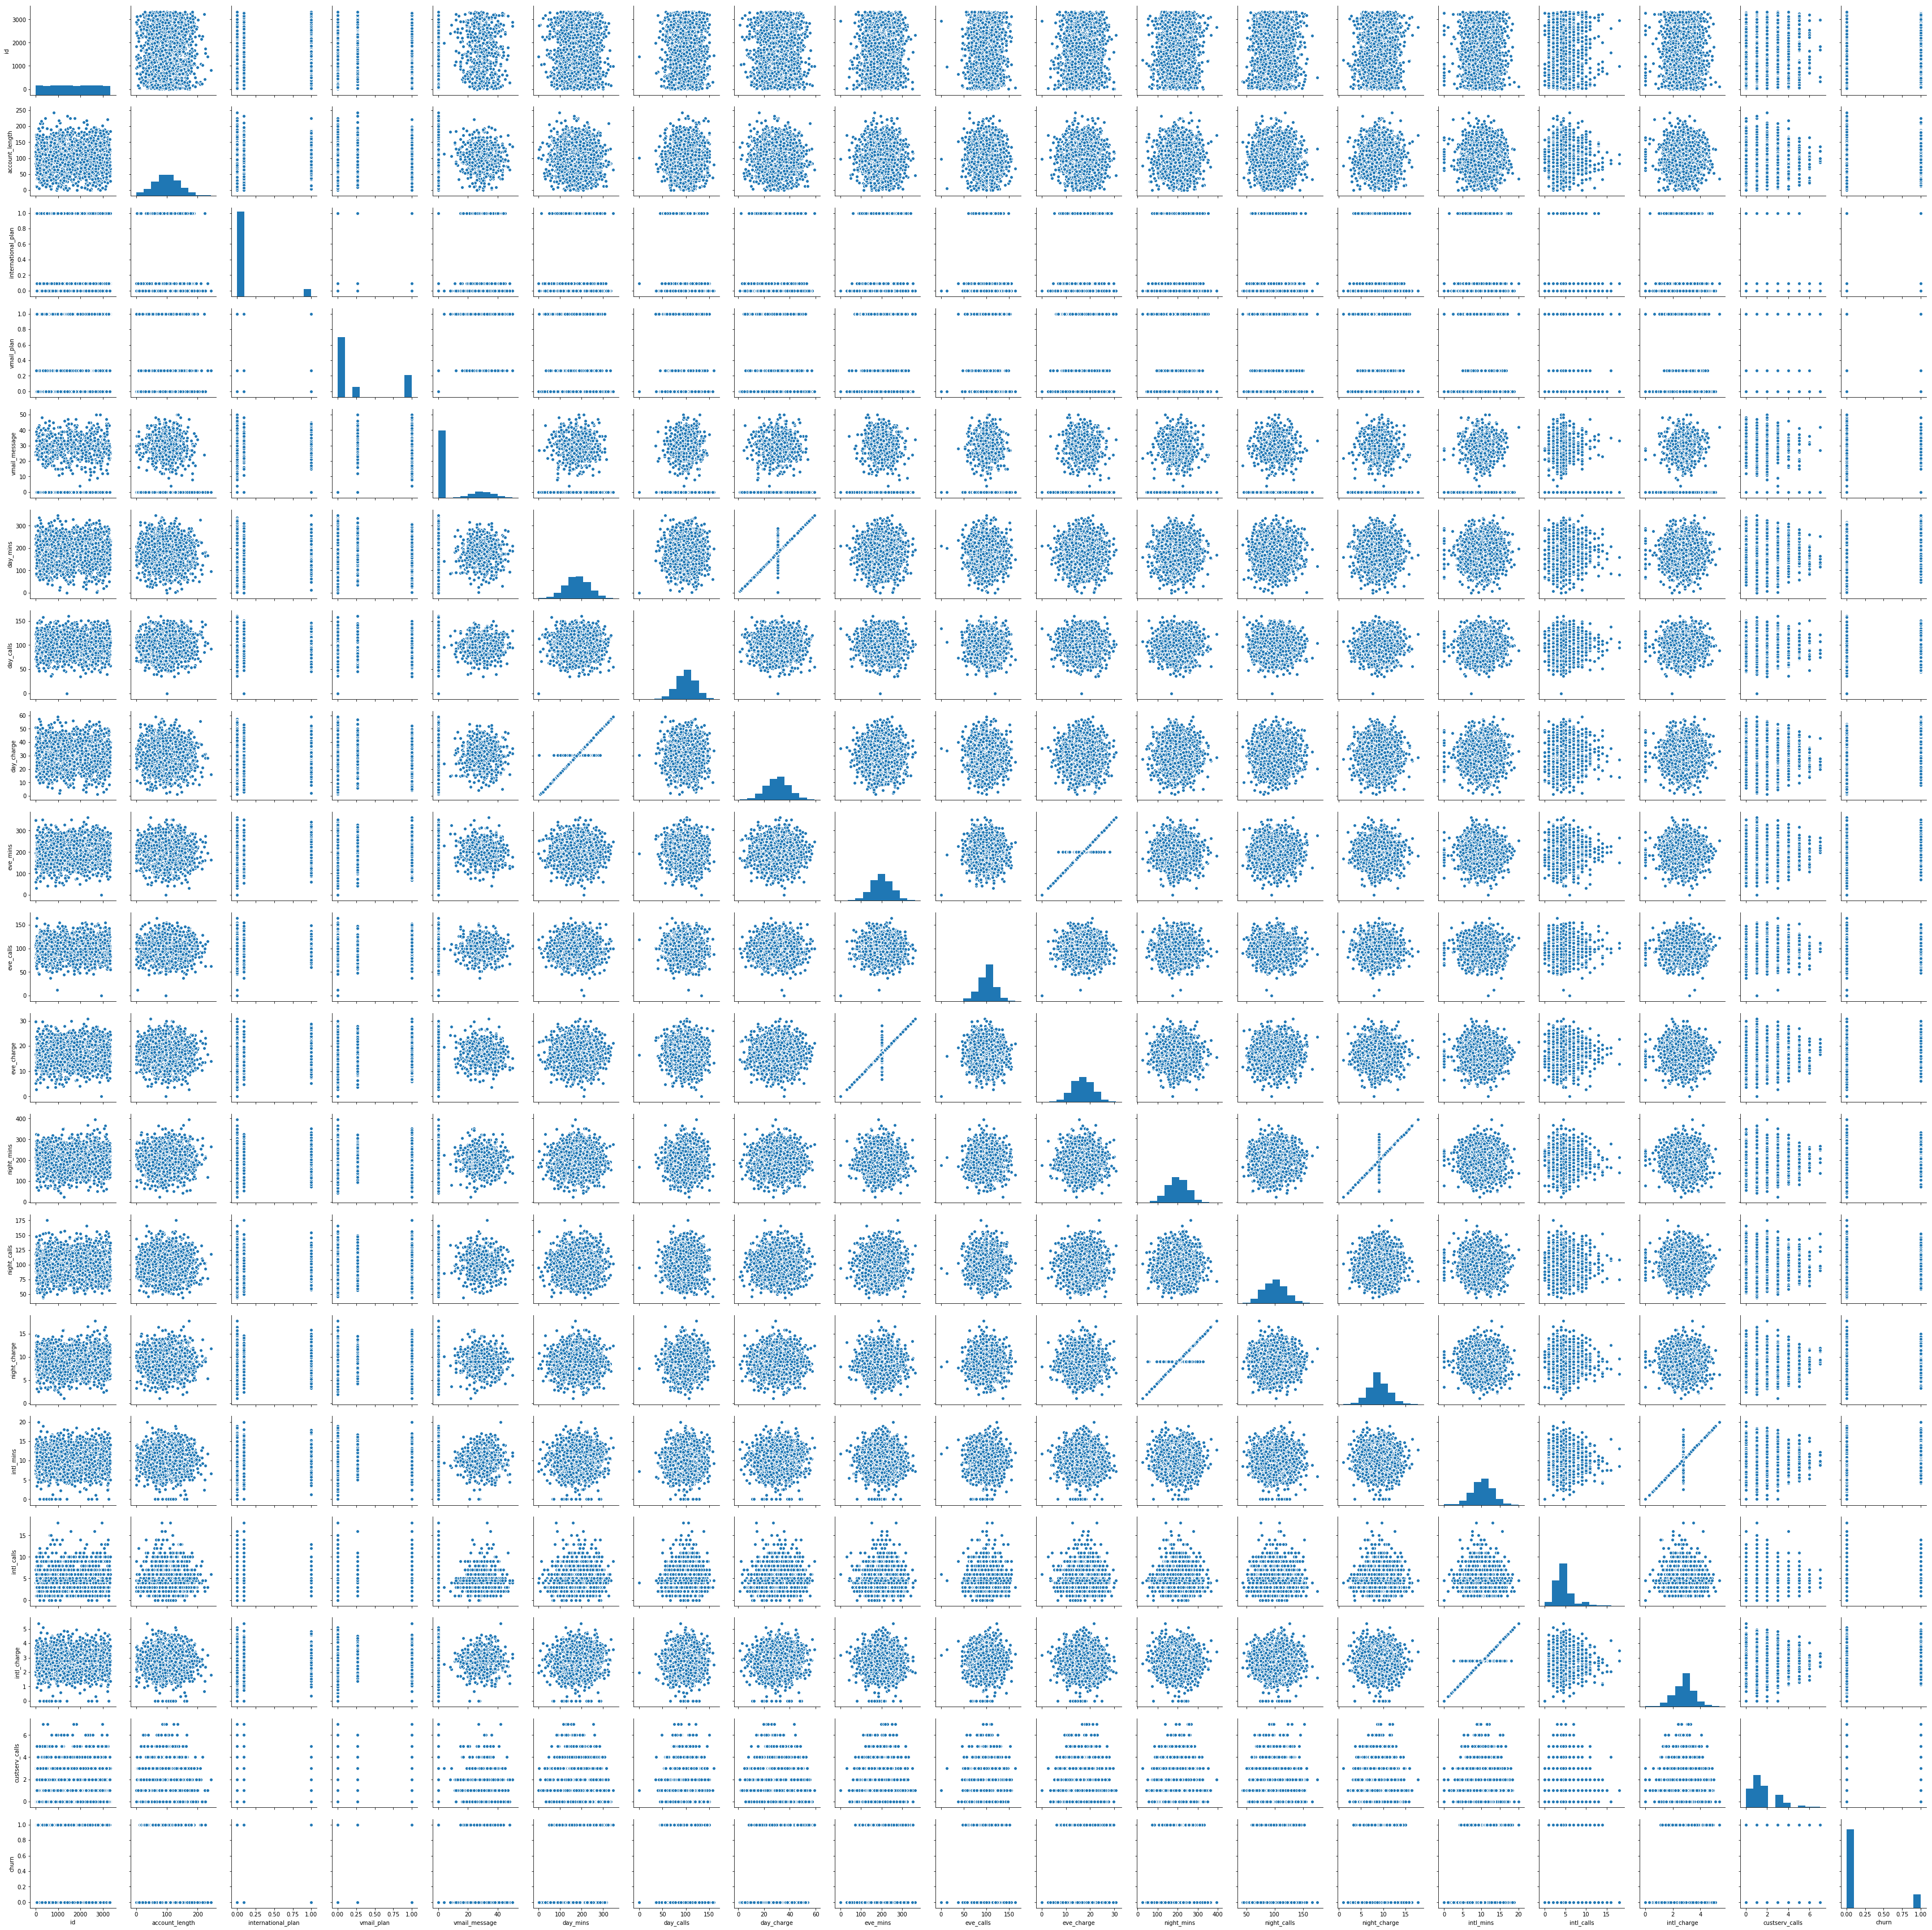

In [54]:
sns.pairplot(df_train0);

In [56]:
#sns.heatmap(df_train)

## Data Preparation

You will probably go back and forth between data preparation and data understanding. Some of the data you won't be able to explore until it is cleaned, and visa versa.

Real world data is messy, and this dataset is no exception. Start off by identifying the features that seem useful, and work on cleaning/preparing those columns first. Remember that you don't have to use every column of a dataset when you are fitting your model.

## Modeling

We've talked a lot about Logistic Regression so far, but there are a **lot** of classification models that you could use. In this section you will get a chance to do a little bit of research about 5 important classification algorithms. 

The purpose of this section is to give you a very very brief introduction to a few of the most popular supervised learning classification algorithms. It is **not** the purpose of this section/assignment that you understand all of the mathematical and programmatic inner-workings of these algorithms, but rather to give you a high level overview of their usage. Please defer your curiosity and perfectionism temporarily and focus on what you need to know in order to get an out-of-the box prediction from these classifiers using the sklearn library.

*   Support Vector Machine
*   Decision Tree Classifier
*   Random Forest Classifier
*   Naive Bayes Classifier
*   K-Nearest Neighbors Classifier


Once you have successfully fit each of these models to the test dataset and calculated their out-of-the-box ROC_AUC score, pick the top two highest performing classifiers and research their hyperparameters for future hyperparameter tuning.

List their hyperparameters here:

### Highest performing model's hyperparameters:

### Second highest performing model's hyperparameters:

___

Below is sample code for how to get an out-of-the-box estimate for a Logistic Regression model. You may reference it when finding the out-of-the-box predictions for the other 5 models.


In [57]:
Y = df_train0['churn']
X = df_train0.drop(['churn'], axis=1)

In [60]:
from sklearn.cross_validation import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression


/Users/darwinm/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [61]:
##### Logistic Regeression OUTB Estimate #####


model = LogisticRegression()
cross_val = KFold(n_splits=3, random_state=42)
scores = cross_val_score(model, X, Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Logistic Regression: ", scores.mean())

Mean AUC Score - Logistic Regression:  0.7914651797821616


In [63]:
# Fit Random Forest Classifier

model = RandomForestClassifier()

kfold = KFold(n_splits=3, random_state=42) 
scores = cross_val_score(model, X, Y, cv=kfold, scoring='roc_auc')
print("Mean AUC Score - Random Forest: ", scores.mean())

Mean AUC Score - Random Forest:  0.8818098705114092


In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
cross_val = KFold(n_splits=3, random_state=42)
scores = cross_val_score(model, X, Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Logistic Regression: ", scores.mean())

Mean AUC Score - Logistic Regression:  0.7914651797821616


In [65]:
### Decision Tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
cross_val = KFold(n_splits=3, random_state=42)
scores = cross_val_score(model2, X, Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Decision Tree: ", scores.mean())

Mean AUC Score - Decision Tree:  0.7975940514506649


In [66]:
### Naive Bayes
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
cross_val = KFold(n_splits=3, random_state=42)
scores = cross_val_score(model4, X, Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Gaussian Naive Bayes: ", scores.mean())

Mean AUC Score - Gaussian Naive Bayes:  0.8298956230587861


In [67]:
### K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
cross_val = KFold(n_splits=3, random_state=42)
scores = cross_val_score(model5, X, Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - K-Nearest Neighbors: ", scores.mean())

Mean AUC Score - K-Nearest Neighbors:  0.5987537195869482


In [68]:
### Support Vector Machine
from sklearn.svm import SVC
model1 = SVC()
cross_val = KFold(n_splits=3, random_state=42)
scores = cross_val_score(model, X, Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Support Vector Machine: ", scores.mean())

Mean AUC Score - Support Vector Machine:  0.7914651797821616


## Evaluation

Start off by making a submission to the Kaggle leaderboard that is purely a column of all 1s or 0s as a baseline. There is a sampleSubmission.csv file that is already prepared in this format if you would like to use that.

pick one of the better models from your out-of-the-box analysis and then use it to make predictions on the test dataset. Then take those predictions and make a new submission to the leaderboad. You are allowed 20 submissions to the leaderboard per day, so don't go submitting willy nilly.

Try and ensure that you have truly improved your classifier before making a new submission. Use the cross-validation techniques that we have been studying to evaluate your model on the training dataset before going to the trouble of making predictions on the test dataset and having to format a new submission.

In [71]:
# Fit to the whole train dataset

RandomForest = RandomForestClassifier()
RandomForest.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
### Naive Bayes
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
cross_val = KFold(n_splits=3, random_state=42)
scores = cross_val_score(model4, X, Y, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Gaussian Naive Bayes: ", scores.mean())
print("Actual Kaggle Score for 20180518.0 was: 0.77640 as opposed to the local Score of 0.8298956230587861")

Mean AUC Score - Gaussian Naive Bayes:  0.8298956230587861
Actual Kaggle Score for 20180518.0 was: 0.77640 as opposed to the local Score of 0.8298956230587861


In [70]:
# Fit to the whole train dataset

gaussian_model = GaussianNB()
gaussian_model.fit(X, Y)

GaussianNB(priors=None)

In [87]:
# and Predict on the test dataset

# Need to split test into X_test Y_test
Y_test = df_test0['churn']
X_test = df_test0.drop(['churn'], axis=1)

yhat_churn = RandomForest.predict(X_test)

df_submission = X_test
df_submission['churn'] = 0
df_submission['churn'] = yhat_churn

df_final_submission = df_submission.filter(['id','churn'], axis=1)
#df_final_submission.drop(['state', 'account_length', 'area_code', 'phone', 'international_plan', 'vmail_plan', 'vmail_message', 'day_mins', 'day_calls', 'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge', 'intl_mins', 'intl_calls', 'intl_charge', 'custserv_calls'],axis=1, inplace=True)
df_final_submission.shape
df_final_submission.head()

id  churn
0   221      0
1  1313      0
2  1635      1
3   289      1
4  2416      0

In [88]:
df_submission.shape
df_final_submission.shape

(1111, 2)

In [90]:
df_final_submission.to_csv("gaussiannaivebayes.csv", index = False)

In [92]:
!kaggle competitions submit -c lambda-school-churn-challenge -f gaussiannaivebayes.csv -m "20180518.0"

Successfully submitted to Lambda School Churn Challenge

## Repeat

The Machine Learning Framework is a cycle. Keep on looping through it and improving your classifier. Don't delete your previous work since we want to see how your thinking developed. Go back and try some hyperparameter tuning, format additional columns/features so that they are ready to be fed to the model. Keep on working down below, don't be afraid to add lots of code cells to your Colab.

## Stretch Goal:

Try and get the highest score that you possibly can. If you're not on the top of the leaderboard, then there must still be ways to improve your classifier that you haven't considered yet.

In [ ]:
##### Your Code Here #####